In [24]:
import pandas as pd
from pymysql import converters
import pymysql
import matplotlib.pyplot as plt

In [25]:
from mysql_config import *
def connectToDB():

    conv=converters.conversions.copy()
    conv[246]=float    # convert decimals to floats
    conn = pymysql.connect(
        host=MYSQL_DATABASE_HOST,
        user=MYSQL_DATABASE_USER,
        password=MYSQL_DATABASE_PASSWORD,
        db=MYSQL_DATABASE_DB,
        cursorclass=pymysql.cursors.DictCursor,
        conv=conv
    )
    curr = conn.cursor()

    return conn, curr

In [26]:
conn, curr = connectToDB()

hours = 5

subsample = hours

hours += 74.5

# fstring not safe, but ok since parsed float
query = f"""
SELECT `timestamp`, `player_count`
FROM Monke
WHERE `timestamp` > (NOW() - INTERVAL {hours} HOUR)
-- AND player_count > 0 AND player_count < 10000
-- AND UNIX_TIMESTAMP(`timestamp`) % {subsample} = 0
ORDER BY timestamp DESC;
"""
curr.execute(query)
recent_updates = [dict(row) for row in curr.fetchall()]
conn.close()

print(f'{len(recent_updates):,}')

0


In [27]:
df = pd.DataFrame(recent_updates)
df.columns = ['timestamp', 'player_count']
df['player_count'] = pd.to_numeric(df['player_count'], errors='coerce')
df = df.astype({'player_count': 'int32'})
df = df.dropna()

length = 2
# df['player_count'] = df['player_count'].rolling(int(length + 1)).median().shift(int(-length/2))
# df['player_count'] = df['player_count'].rolling(int(length + 1)).mean().shift(int(-length/2))

for i in range (0, 0):
    df = df[df['player_count'] < df['player_count'].shift(-1) + 50]
    df = df[df['player_count'] > df['player_count'].shift(-1) - 50]

df.head()

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

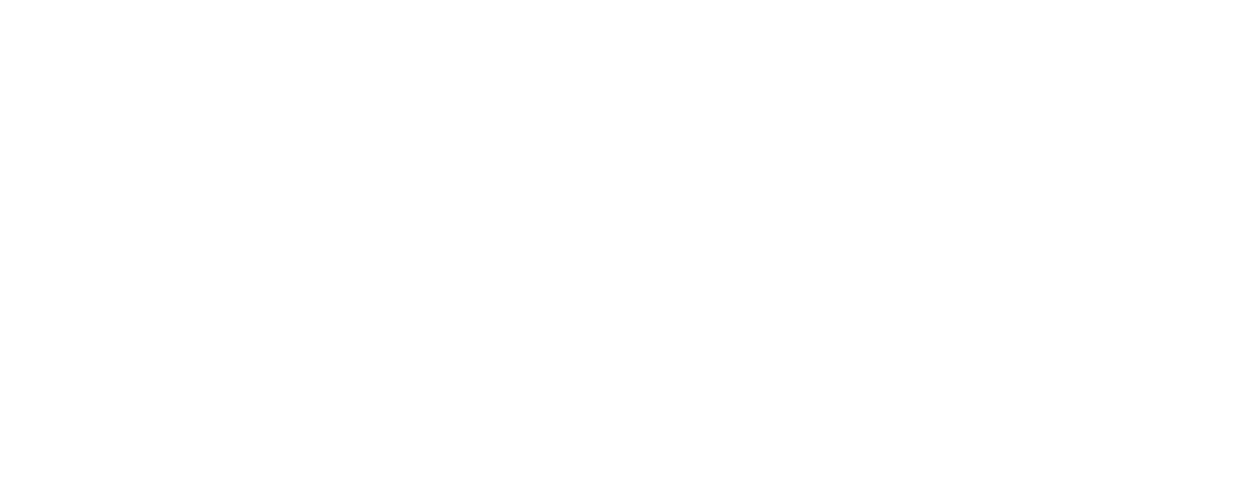

In [ ]:
# df['timestamp'] = pd.to_datetime(df['timestamp'])
df.columns = ['Time', 'Player Count']

params = {"ytick.color": "w",
            "xtick.color": "w",
            "axes.labelcolor": "w",
            "axes.edgecolor": "w"}
plt.rcParams.update(params)
fig = plt.figure(figsize=(7, 3), dpi=200)
ax = plt.axes()
plt.margins(x=0)

scatter = True
if scatter:
    plt.scatter(x=df['Time'], y=df['Player Count'], alpha=.02, s=.5, c='w')
else:
    df.plot(ax=ax, x='Time', y='Player Count', linewidth=3.0, c='w')
    ax.get_legend().remove()

ax.get_xaxis().set_visible(False)
# ax.get_legend().remove()

plt.savefig('graph.png', transparent=True, bbox_inches='tight')
plt.draw()